In [ ]:
# Jupyter dirty hack
import os
import sys

PATH = "/home/emaballarin/repositories/celeba_sweeping_cvae/src/"
os.chdir(PATH)
sys.path.append(PATH)

In [ ]:
from typing import Tuple
import torch as th
from models import CelebACVAE
from safetensors.torch import load_model
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

In [ ]:
DEVICE_AUTODETECT: bool = True
IMG_SHAPE: Tuple[int, int, int] = (3, 64, 64)
TEST_BS: int = 32
LATENT_SIZE: int = 128
CONDITION_SIZE: int = 40

In [ ]:
device = th.device("cuda" if (th.cuda.is_available() and DEVICE_AUTODETECT) else "cpu")

In [ ]:
model = CelebACVAE(lat_size=LATENT_SIZE, cond_size=CONDITION_SIZE).to(device)

In [ ]:
_ = load_model(model, "./celeba_cvae_v8.safetensors")

In [ ]:
_ = model.to(device)
_ = model.eval()

In [ ]:
# condition = th.round(2 * th.rand(TEST_BS, CONDITION_SIZE).to(device) - 1)
condition = th.zeros(TEST_BS, CONDITION_SIZE).to(device)
# condition[:, 2] = 1

In [ ]:
with th.no_grad():
    img = model.sample_eval(z=None, c=condition.to(device))

In [ ]:
for i in range(32):
    plt.imshow(img[i].permute(1, 2, 0).cpu().detach().numpy())
    plt.show()

In [ ]:
# plt.imshow(make_grid(img).permute(1, 2, 0).cpu().detach().numpy())

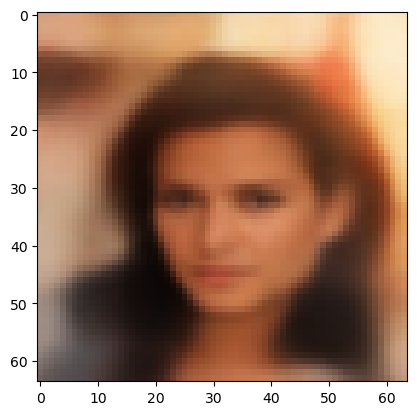

In [86]:
z = th.randn(1, LATENT_SIZE).to(device)
c = th.zeros(1, CONDITION_SIZE).to(device)

with th.no_grad():
    img = model.sample_eval(z=z, c=c)
plt.imshow(img[0].permute(1, 2, 0).cpu().detach().numpy())

In [87]:
myz = z.detach()

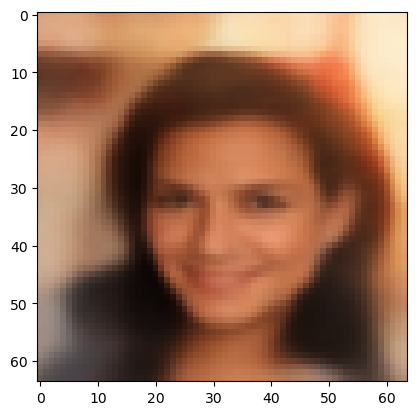

In [140]:
c = th.zeros(1, CONDITION_SIZE).to(device)
c[0, 31] = 2
for i in range(1):
    # c[0, 0] = 4 * i / 20 - 2
    # c[0, 33] = 4 * (10 - i) / 10 - 2
    with th.no_grad():
        img = model.sample_eval(z=myz, c=c)
    plt.imshow(img[0].permute(1, 2, 0).cpu().detach().numpy())
    plt.show()

In [146]:
test_attrs = th.randint(0, 2, (128, CONDITION_SIZE))

In [147]:
idxsel = 

In [148]:
test_sel = 

In [149]:
test_sel.shape

torch.Size([128, 12])